In [18]:
import skimage.exposure
import skimage.transform
import numpy as np
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None

### Read raw Image as float

In [97]:
#pilfile = PIL.Image.open("smFISH_single_FOV_v2.tif")
#pilfile = PIL.Image.open("smFISH_single_FOV_v3.tif")
pilfile = PIL.Image.open("smFISH_stitched_OLEH.tif")
w_raw, h_raw = pilfile.size
print(w_raw, h_raw)

#img_raw = np.array(PIL.Image.open("smFISH_stitched_OLEH.tif").convert('F'))
#print(img_raw.shape, np.min(img_raw.flatten()), np.max(img_raw.flatten()))

21505 21505


### Resize to smaller size using bilinear interpolation

In [98]:
reduction_factor = 8
w_new, h_new = int(w_raw/reduction_factor) , int(h_raw/reduction_factor)
pilresize = pilfile.convert("F").resize((w_new, h_new), resample=PIL.Image.BILINEAR)
print(w_new, h_new)

2688 2688


### Remove the background

In [99]:
img_np = np.array(pilresize)
image_thresh = skimage.filters.threshold_otsu(img_np)

### Enhance the contrast and rescale in range (0,1)

In [102]:
# Linear transfromation
ql, qr = np.percentile(img_np[img_np>image_thresh].flatten(), q=(0,100))  # note that the statistics are compute on the foreground only
img_tmp3 = skimage.exposure.rescale_intensity(img_np, in_range=(ql, qr), out_range=(0.0,1.0))  

# Power-law transformation on top of simple rtescaling
img_tmp4 = skimage.exposure.adjust_gamma(img_tmp3, gamma=0.5, gain=1)

# Non-linear transformation
img_tmp5 = skimage.exposure.equalize_hist(img_np, mask=img_np>image_thresh)
img_tmp6 = skimage.exposure.equalize_adapthist(img_tmp3, kernel_size=20, clip_limit=0.03)

### Visualize

tensor([1435]) tensor([1970])


(array([4.20988952e+00, 4.03223985e+01, 3.16912247e-01, 2.75149529e-01,
        2.64437236e-01, 2.53877186e-01, 2.49503691e-01, 2.43317135e-01,
        2.36660012e-01, 2.30805620e-01, 2.27304056e-01, 2.18647029e-01,
        2.10190684e-01, 2.04287851e-01, 1.97866012e-01, 1.90939006e-01,
        1.84115801e-01, 1.73887915e-01, 1.67659837e-01, 1.56061774e-01,
        1.48968686e-01, 1.41059028e-01, 1.30000731e-01, 1.21253742e-01,
        1.11994668e-01, 1.02265027e-01, 9.18502981e-02, 8.44596465e-02,
        7.54220145e-02, 6.61352594e-02, 6.06891520e-02, 5.22189670e-02,
        4.60116501e-02, 4.14097931e-02, 3.48841522e-02, 2.89467187e-02,
        2.53413540e-02, 2.20127927e-02, 1.77154195e-02, 1.44906595e-02,
        1.21309103e-02, 9.27983498e-03, 7.46677252e-03, 6.13119597e-03,
        4.58801685e-03, 3.48080313e-03, 2.60887232e-03, 1.66774066e-03,
        1.04493295e-03, 5.60526945e-04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 

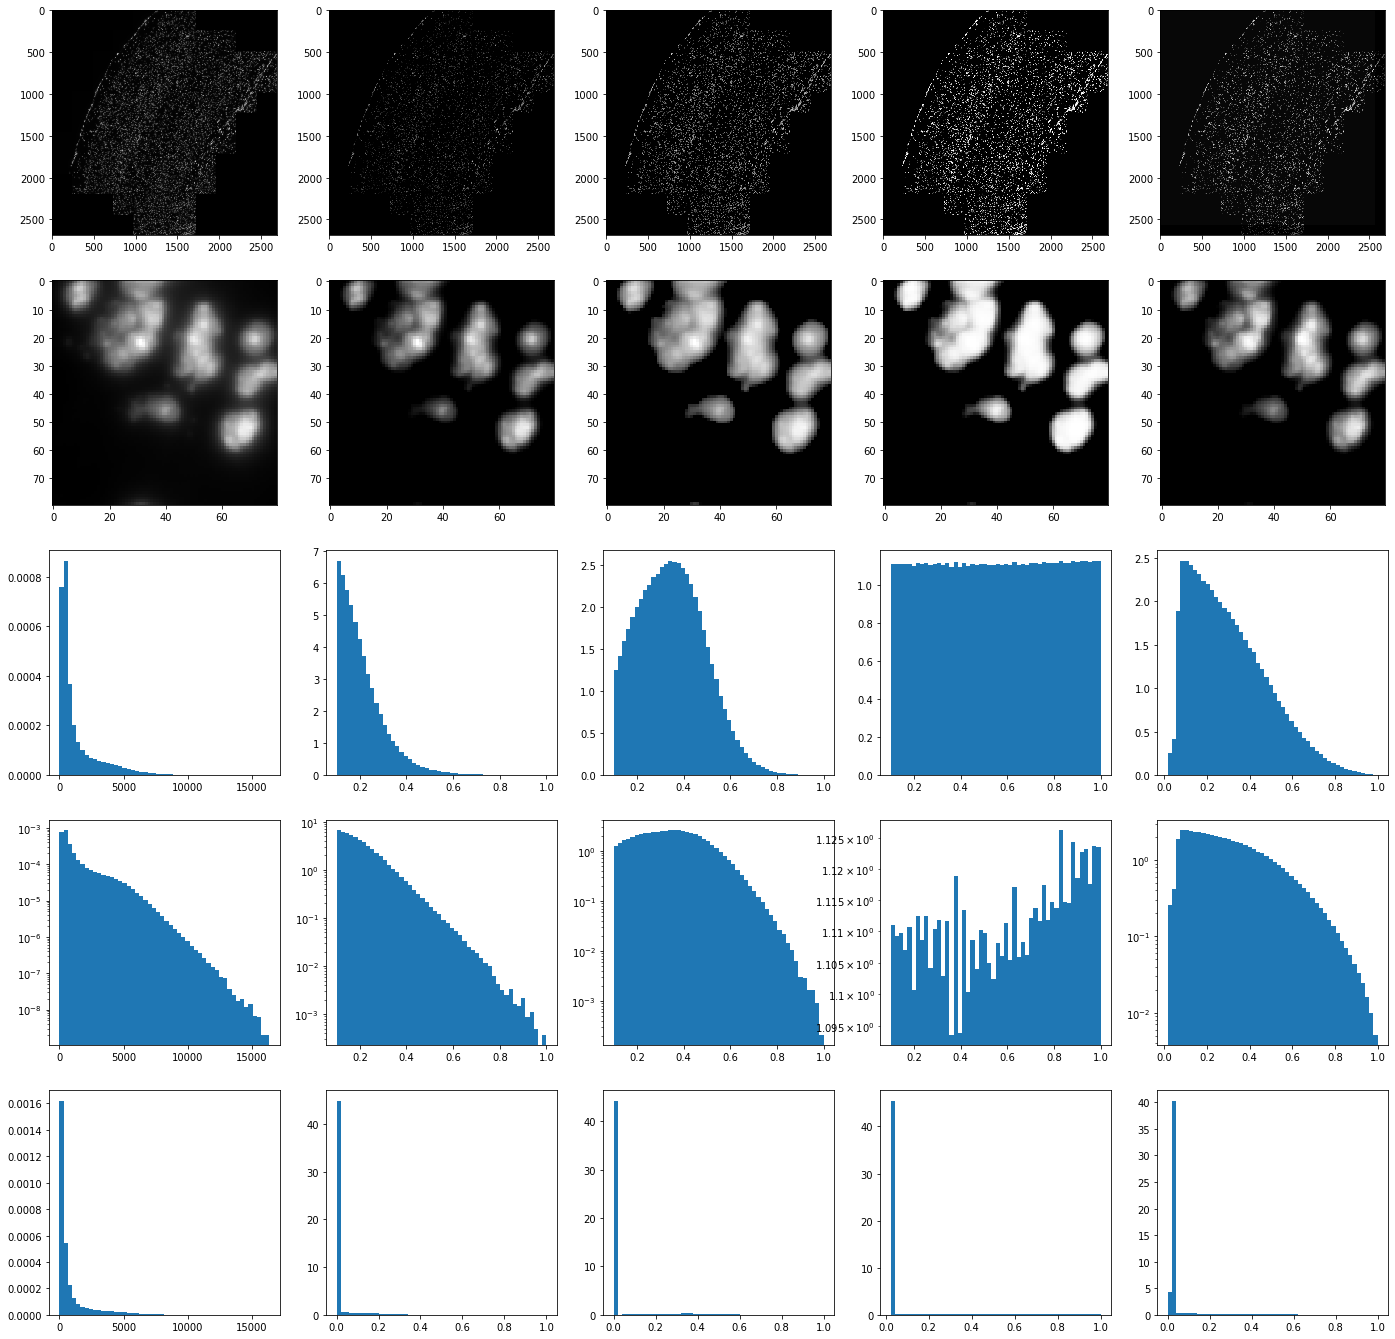

In [103]:
delta = 80
iw = torch.randint(low=0, high=img_tmp3.shape[-2]-delta, size=[1])
ih = torch.randint(low=0, high=img_tmp3.shape[-1]-delta, size=[1])
print(iw,ih)
#iw,ih = 250, 1521

figure, axes = plt.subplots(ncols=5, nrows=5, figsize=(24, 24))
axes[0,0].imshow(img_np, cmap='gray')
axes[0,1].imshow(img_tmp3, cmap='gray')
axes[0,2].imshow(img_tmp4, cmap='gray')
axes[0,3].imshow(img_tmp5, cmap='gray')
axes[0,4].imshow(img_tmp6, cmap='gray')
axes[1,0].imshow(img_np[iw:iw+delta, ih:ih+delta], cmap='gray')
axes[1,1].imshow(img_tmp3[iw:iw+delta, ih:ih+delta], cmap='gray')
axes[1,2].imshow(img_tmp4[iw:iw+delta, ih:ih+delta], cmap='gray')
axes[1,3].imshow(img_tmp5[iw:iw+delta, ih:ih+delta], cmap='gray')
axes[1,4].imshow(img_tmp6[iw:iw+delta, ih:ih+delta], cmap='gray')
axes[2,0].hist(img_np[img_np>0].flatten(), bins=50, density=True)
axes[2,1].hist(img_tmp3[img_tmp3>0.1].flatten(), bins=50, density=True)
axes[2,2].hist(img_tmp4[img_tmp4>0.1].flatten(), bins=50, density=True)
axes[2,3].hist(img_tmp5[img_tmp5>0.1].flatten(), bins=50, density=True)
axes[2,4].hist(img_tmp6[img_tmp5>0.1].flatten(), bins=50, density=True)

axes[3,0].set_yscale('log')
axes[3,1].set_yscale('log')
axes[3,2].set_yscale('log')
axes[3,3].set_yscale('log')
axes[3,4].set_yscale('log')

axes[3,0].hist(img_np[img_np>0].flatten(), bins=50, density=True)
axes[3,1].hist(img_tmp3[img_tmp3>0.1].flatten(), bins=50, density=True)
axes[3,2].hist(img_tmp4[img_tmp4>0.1].flatten(), bins=50, density=True)
axes[3,3].hist(img_tmp5[img_tmp5>0.1].flatten(), bins=50, density=True)
axes[3,4].hist(img_tmp6[img_tmp5>0.1].flatten(), bins=50, density=True)

axes[4,0].hist(img_np.flatten(), bins=50, density=True)
axes[4,1].hist(img_tmp3.flatten(), bins=50, density=True)
axes[4,2].hist(img_tmp4.flatten(), bins=50, density=True)
axes[4,3].hist(img_tmp5.flatten(), bins=50, density=True)
axes[4,4].hist(img_tmp6.flatten(), bins=50, density=True)